# Layer specific DMG
- Within each brain region, the DMG specific to each layer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dmg_result = pd.read_msgpack('./ITSpatialPairwiseDEG/TotalPairwiseMarker.msg')
dmg_result['FromRegion'] = dmg_result['cluster_from'].apply(lambda i: i.split('+')[1])
dmg_result['FromLayer'] = dmg_result['cluster_from'].apply(lambda i: i.split('+')[0])
dmg_result['ToRegion'] = dmg_result['cluster_to'].apply(lambda i: i.split('+')[1])
dmg_result['ToLayer'] = dmg_result['cluster_to'].apply(lambda i: i.split('+')[0])

# only select DMG within each region
dmg_result = dmg_result[dmg_result['FromLayer'] == dmg_result['ToLayer']].copy()

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
group_mch_level = pd.read_msgpack('./ITSpatialPairwiseDEG/ClusterMean.genes.msg')
dmg_result['gene_mcg_from'] = dmg_result.apply(
    lambda i: group_mch_level.at[i['cluster_from'], i['gene_id']], axis=1)
dmg_result['gene_mcg_to'] = dmg_result.apply(
    lambda i: group_mch_level.at[i['cluster_to'], i['gene_id']], axis=1)
dmg_result = dmg_result[dmg_result['gene_mcg_from'] < dmg_result['gene_mcg_to']].copy()

In [4]:
# further filtering
dmg_result = dmg_result[(dmg_result['AUROC'] > 0.8) & 
                        #(dmg_result['gene_mcg_from'] < 1.2) & 
                        #(dmg_result['gene_mcg_to'] > 0.8) & 
                        ((dmg_result['gene_mcg_to'] - dmg_result['gene_mcg_from']) > 0.5)].copy()

In [5]:
repeat_counts = dmg_result.groupby(['FromRegion', 'ToRegion', 'gene_name']).apply(lambda i: i.shape[0])
repeat_counts.name = 'Count'
layer_compare_repeats_in_region = repeat_counts.reset_index()

In [6]:
dmg_result.to_csv('RegionSpecificDMG.csv', index=None)

In [7]:
group_order = [
    'IT-L23+ORB', 'IT-L5+ORB', 'IT-L23+PFC', 'IT-L5+PFC', 'IT-L6+PFC',
    'IT-L23+ACA', 'IT-L5+ACA', 'IT-L6+ACA', 'IT-L23+AI', 'IT-L5+AI',
    'IT-L6+AI', 'IT-L23+MOs', 'IT-L4+MOs', 'IT-L5+MOs', 'IT-L6+MOs',
    'IT-L23+MOp', 'IT-L4+MOp', 'IT-L5+MOp', 'IT-L6+MOp', 'IT-L23+SSp',
    'IT-L4+SSp', 'IT-L5+SSp', 'IT-L6+SSp', 'IT-L23+SSs', 'IT-L4+SSs',
    'IT-L5+SSs', 'IT-L6+SSs'
]
group_mch_level = group_mch_level.loc[group_order].copy()

## Assign to each group - L23

- In all the pairwise comparisons related to a gene, if the COI only appears in sig hypo side but not in sig hyper side, then the gene is assign to hypo gene group of this COI

In [8]:
layer = 'IT-L23'

['region_hypo_genes.IT-L23.obj']

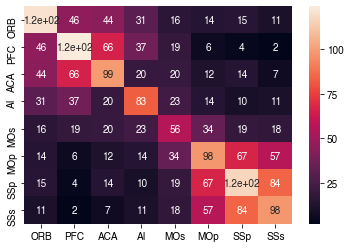

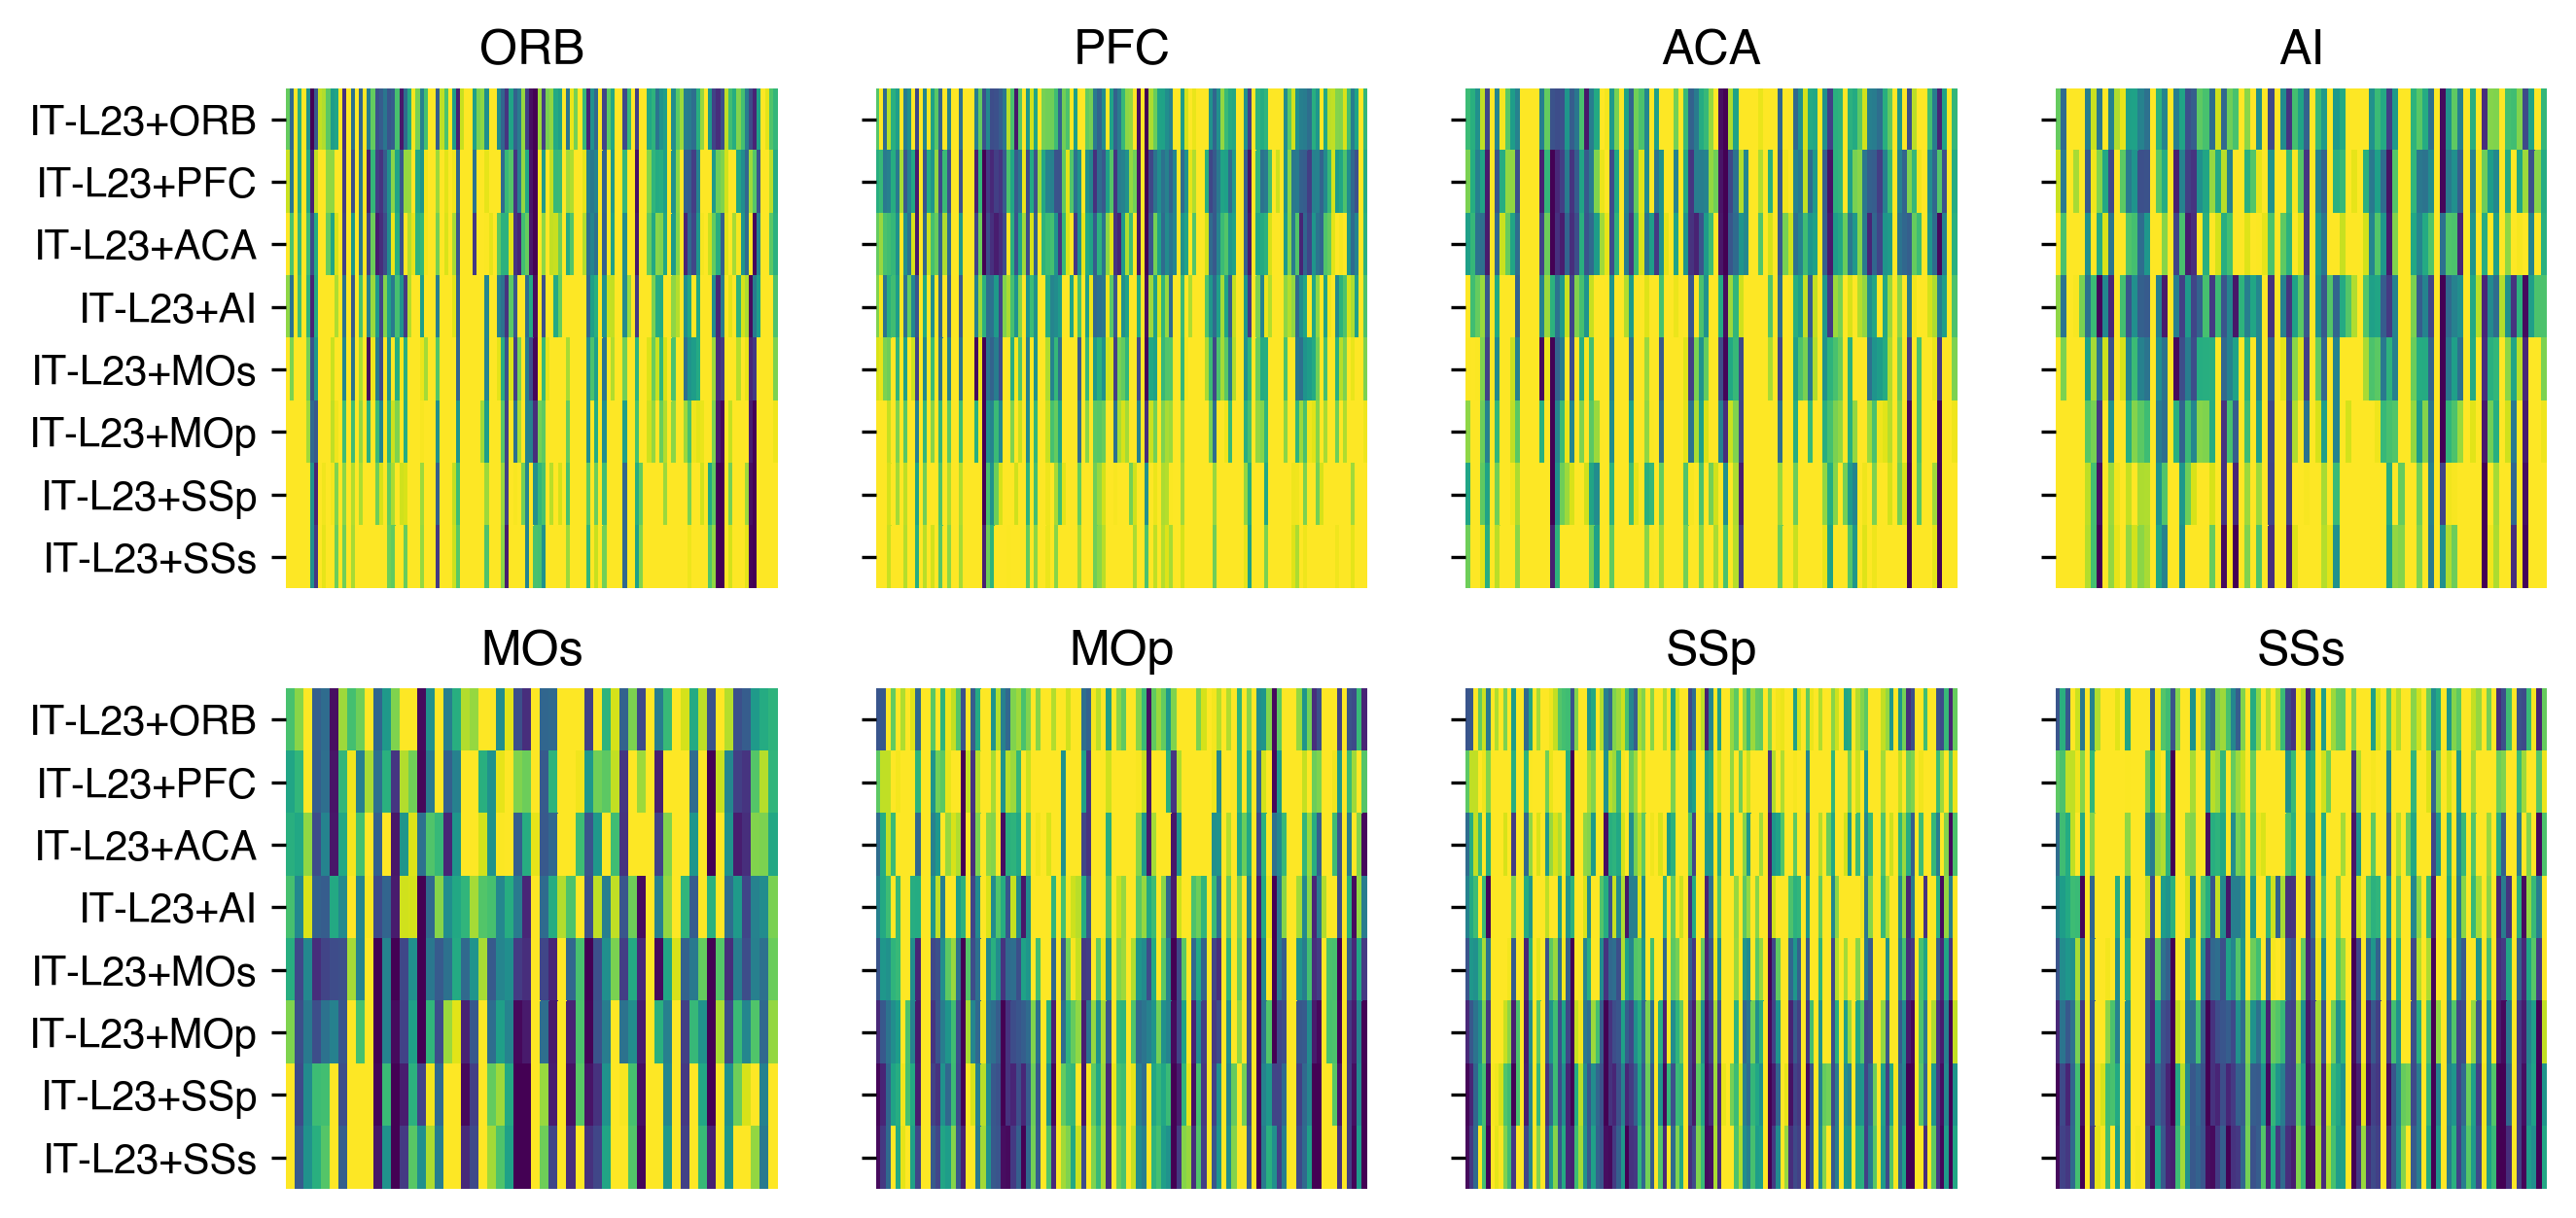

In [9]:
layer_dmg_result = dmg_result[dmg_result['FromLayer'] == layer]

region_hypo_genes = {}
for gene, gene_df in layer_dmg_result.groupby('gene_id'):
    pass_region = set(gene_df['FromRegion'].unique()) - set(gene_df['ToRegion'].unique())
    for region in pass_region:
        region_hypo_genes.setdefault(region, set()).add(gene)

records = {}
# shared markers
for region, genes in region_hypo_genes.items():
    for region2, genes2 in region_hypo_genes.items():
        records[(region, region2)] = len(genes & genes2)
        
region_order = ['ORB', 'PFC', 'ACA', 'AI', 'MOs', 'MOp', 'SSp', 'SSs']
sns.heatmap(pd.Series(records).unstack().loc[region_order, region_order], 
            annot=True)

fig, axes = plt.subplots(figsize=(10, 5), dpi=300, nrows=2, ncols=4, sharey=True)
for ax, region in zip(axes.flat, region_order):
    sns.heatmap(group_mch_level[group_mch_level.index.str.startswith(layer)][region_hypo_genes[region]], 
                vmin=0.5, vmax=1.5, ax=ax, cbar=False, cmap='viridis')
    ax.set(xticks=[], title=region, xlabel='', ylabel='')
    
import joblib
joblib.dump(region_hypo_genes, f'region_hypo_genes.{layer}.obj')

## Assign to each group - L4 skipped
- L4 only come from MO and SS
- MOs have sig DMG to SS, but that could due to unclear boarder of layer, probably hard to explain
- discuss L4 in layer specific marker analysis instead of region specific marker

In [10]:
pass

## Assign to each group - L5

In [11]:
layer = 'IT-L5'

['region_hypo_genes.IT-L5.obj']

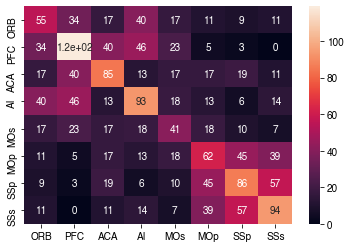

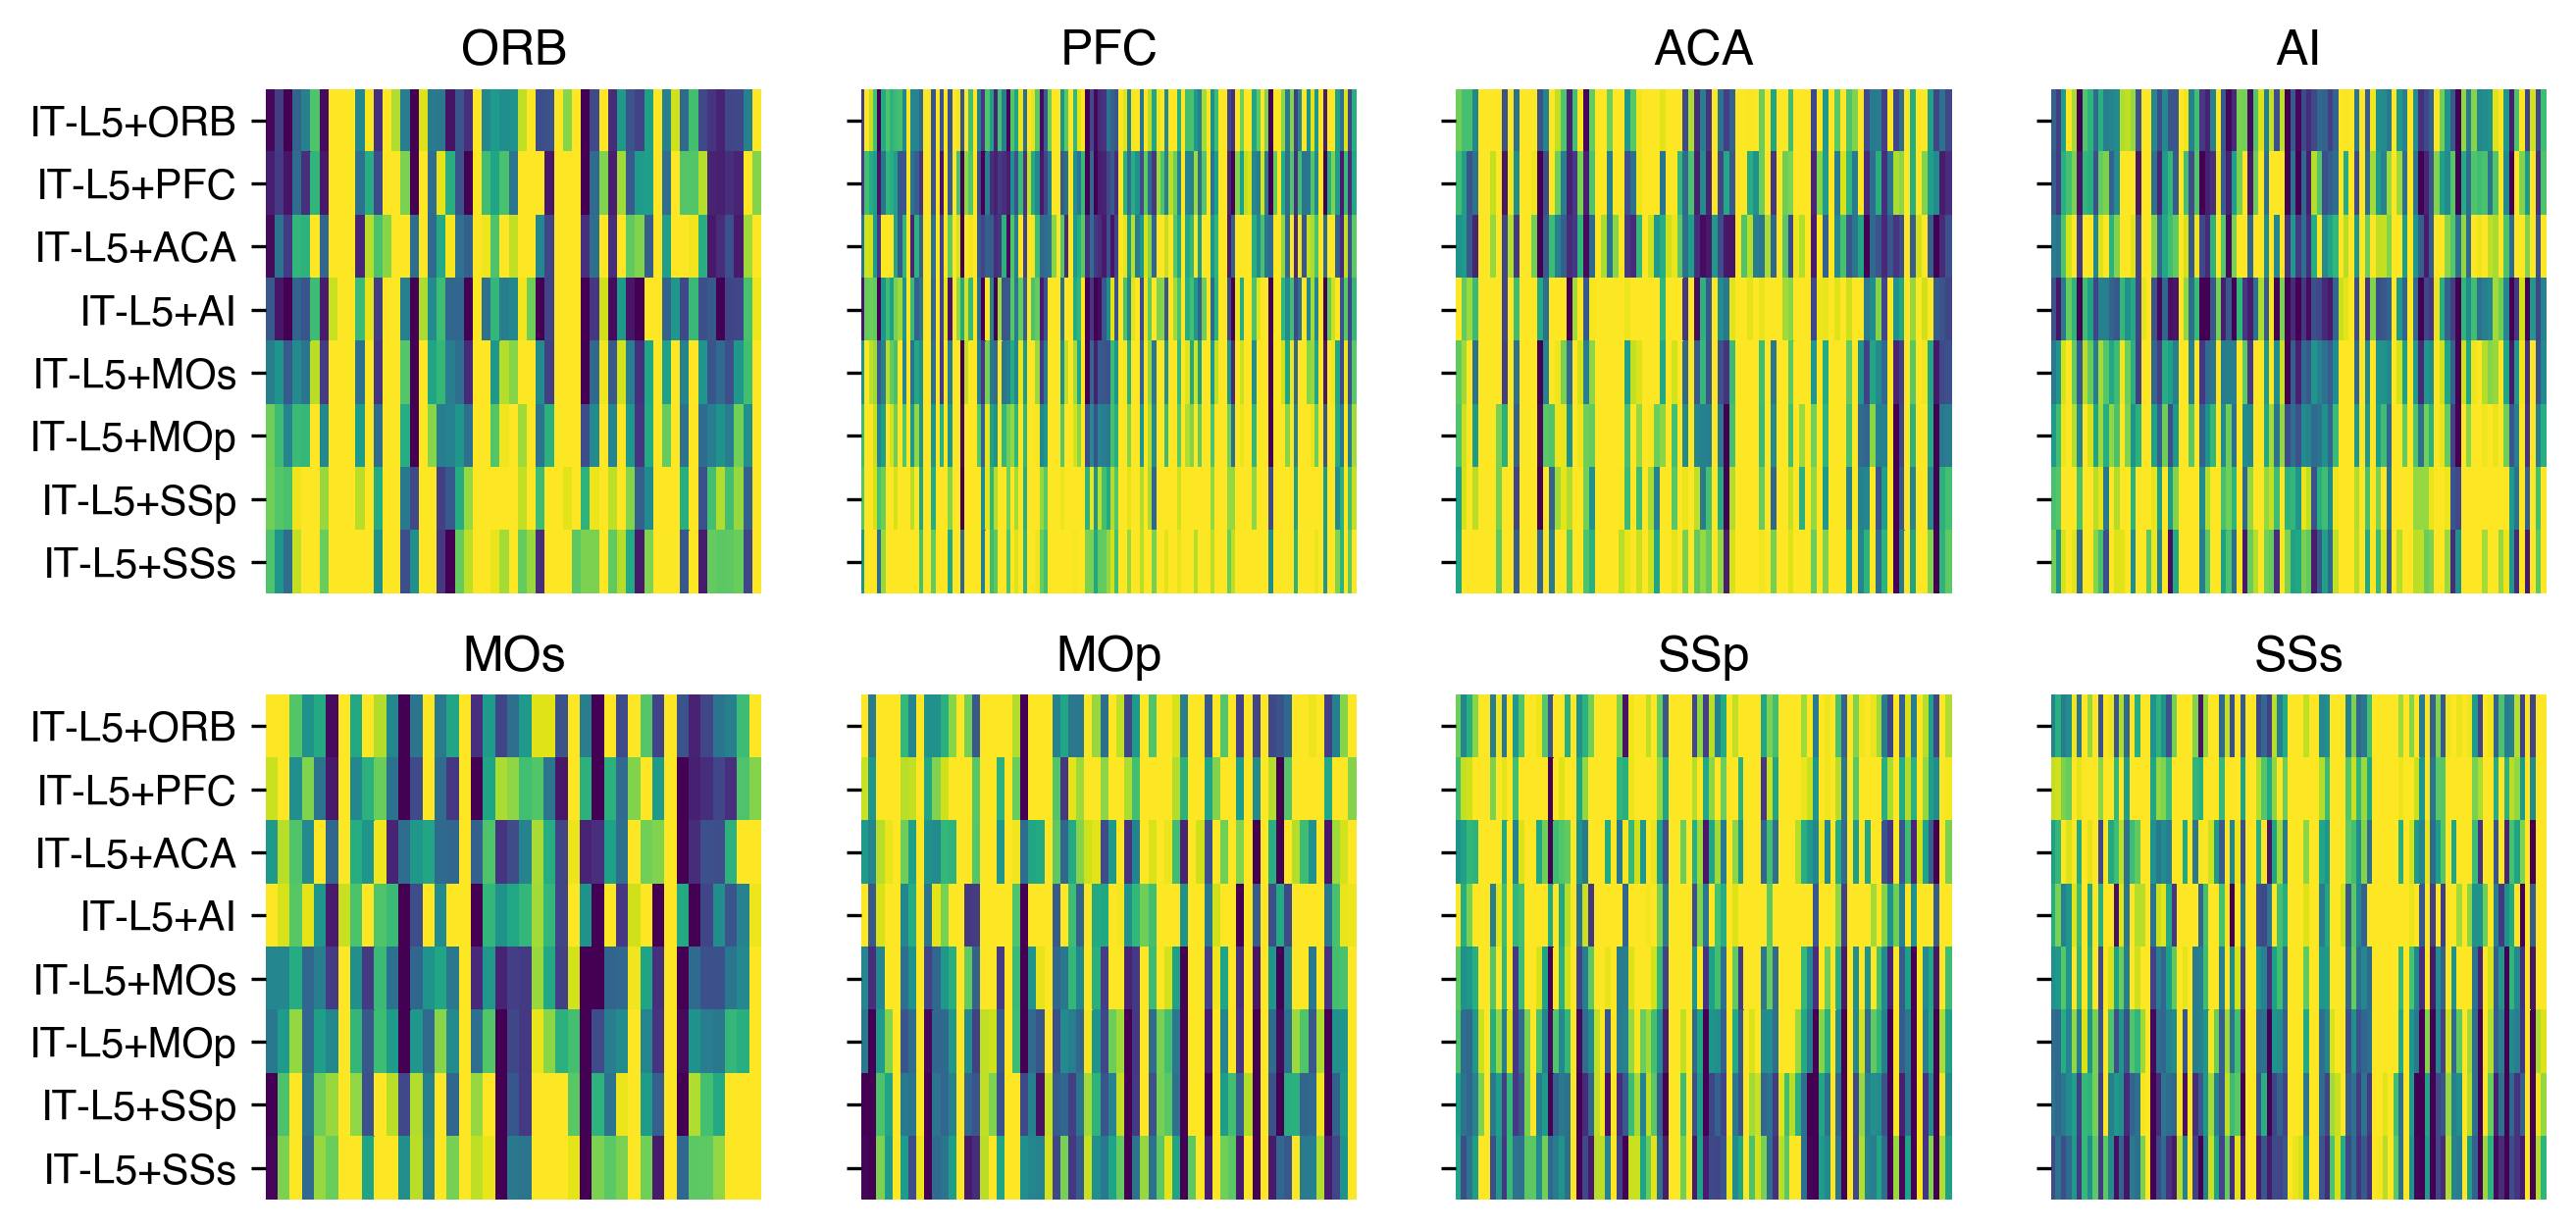

In [12]:
layer_dmg_result = dmg_result[dmg_result['FromLayer'] == layer]

region_hypo_genes = {}
for gene, gene_df in layer_dmg_result.groupby('gene_id'):
    pass_region = set(gene_df['FromRegion'].unique()) - set(gene_df['ToRegion'].unique())
    for region in pass_region:
        region_hypo_genes.setdefault(region, set()).add(gene)

records = {}
# shared markers
for region, genes in region_hypo_genes.items():
    for region2, genes2 in region_hypo_genes.items():
        records[(region, region2)] = len(genes & genes2)
        
region_order = ['ORB', 'PFC', 'ACA', 'AI', 'MOs', 'MOp', 'SSp', 'SSs']
sns.heatmap(pd.Series(records).unstack().loc[region_order, region_order], 
            annot=True)

fig, axes = plt.subplots(figsize=(10, 5), dpi=300, nrows=2, ncols=4, sharey=True)
for ax, region in zip(axes.flat, region_order):
    sns.heatmap(group_mch_level[group_mch_level.index.str.startswith(layer)][region_hypo_genes[region]], 
                vmin=0.5, vmax=1.5, ax=ax, cbar=False, cmap='viridis')
    ax.set(xticks=[], title=region, xlabel='', ylabel='')
    
import joblib
joblib.dump(region_hypo_genes, f'region_hypo_genes.{layer}.obj')

## Assign to each group - L6

In [13]:
layer = 'IT-L6'

['region_hypo_genes.IT-L6.obj']

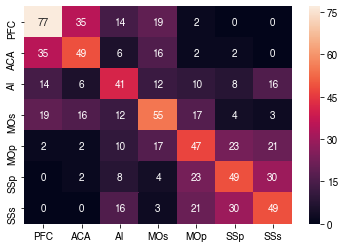

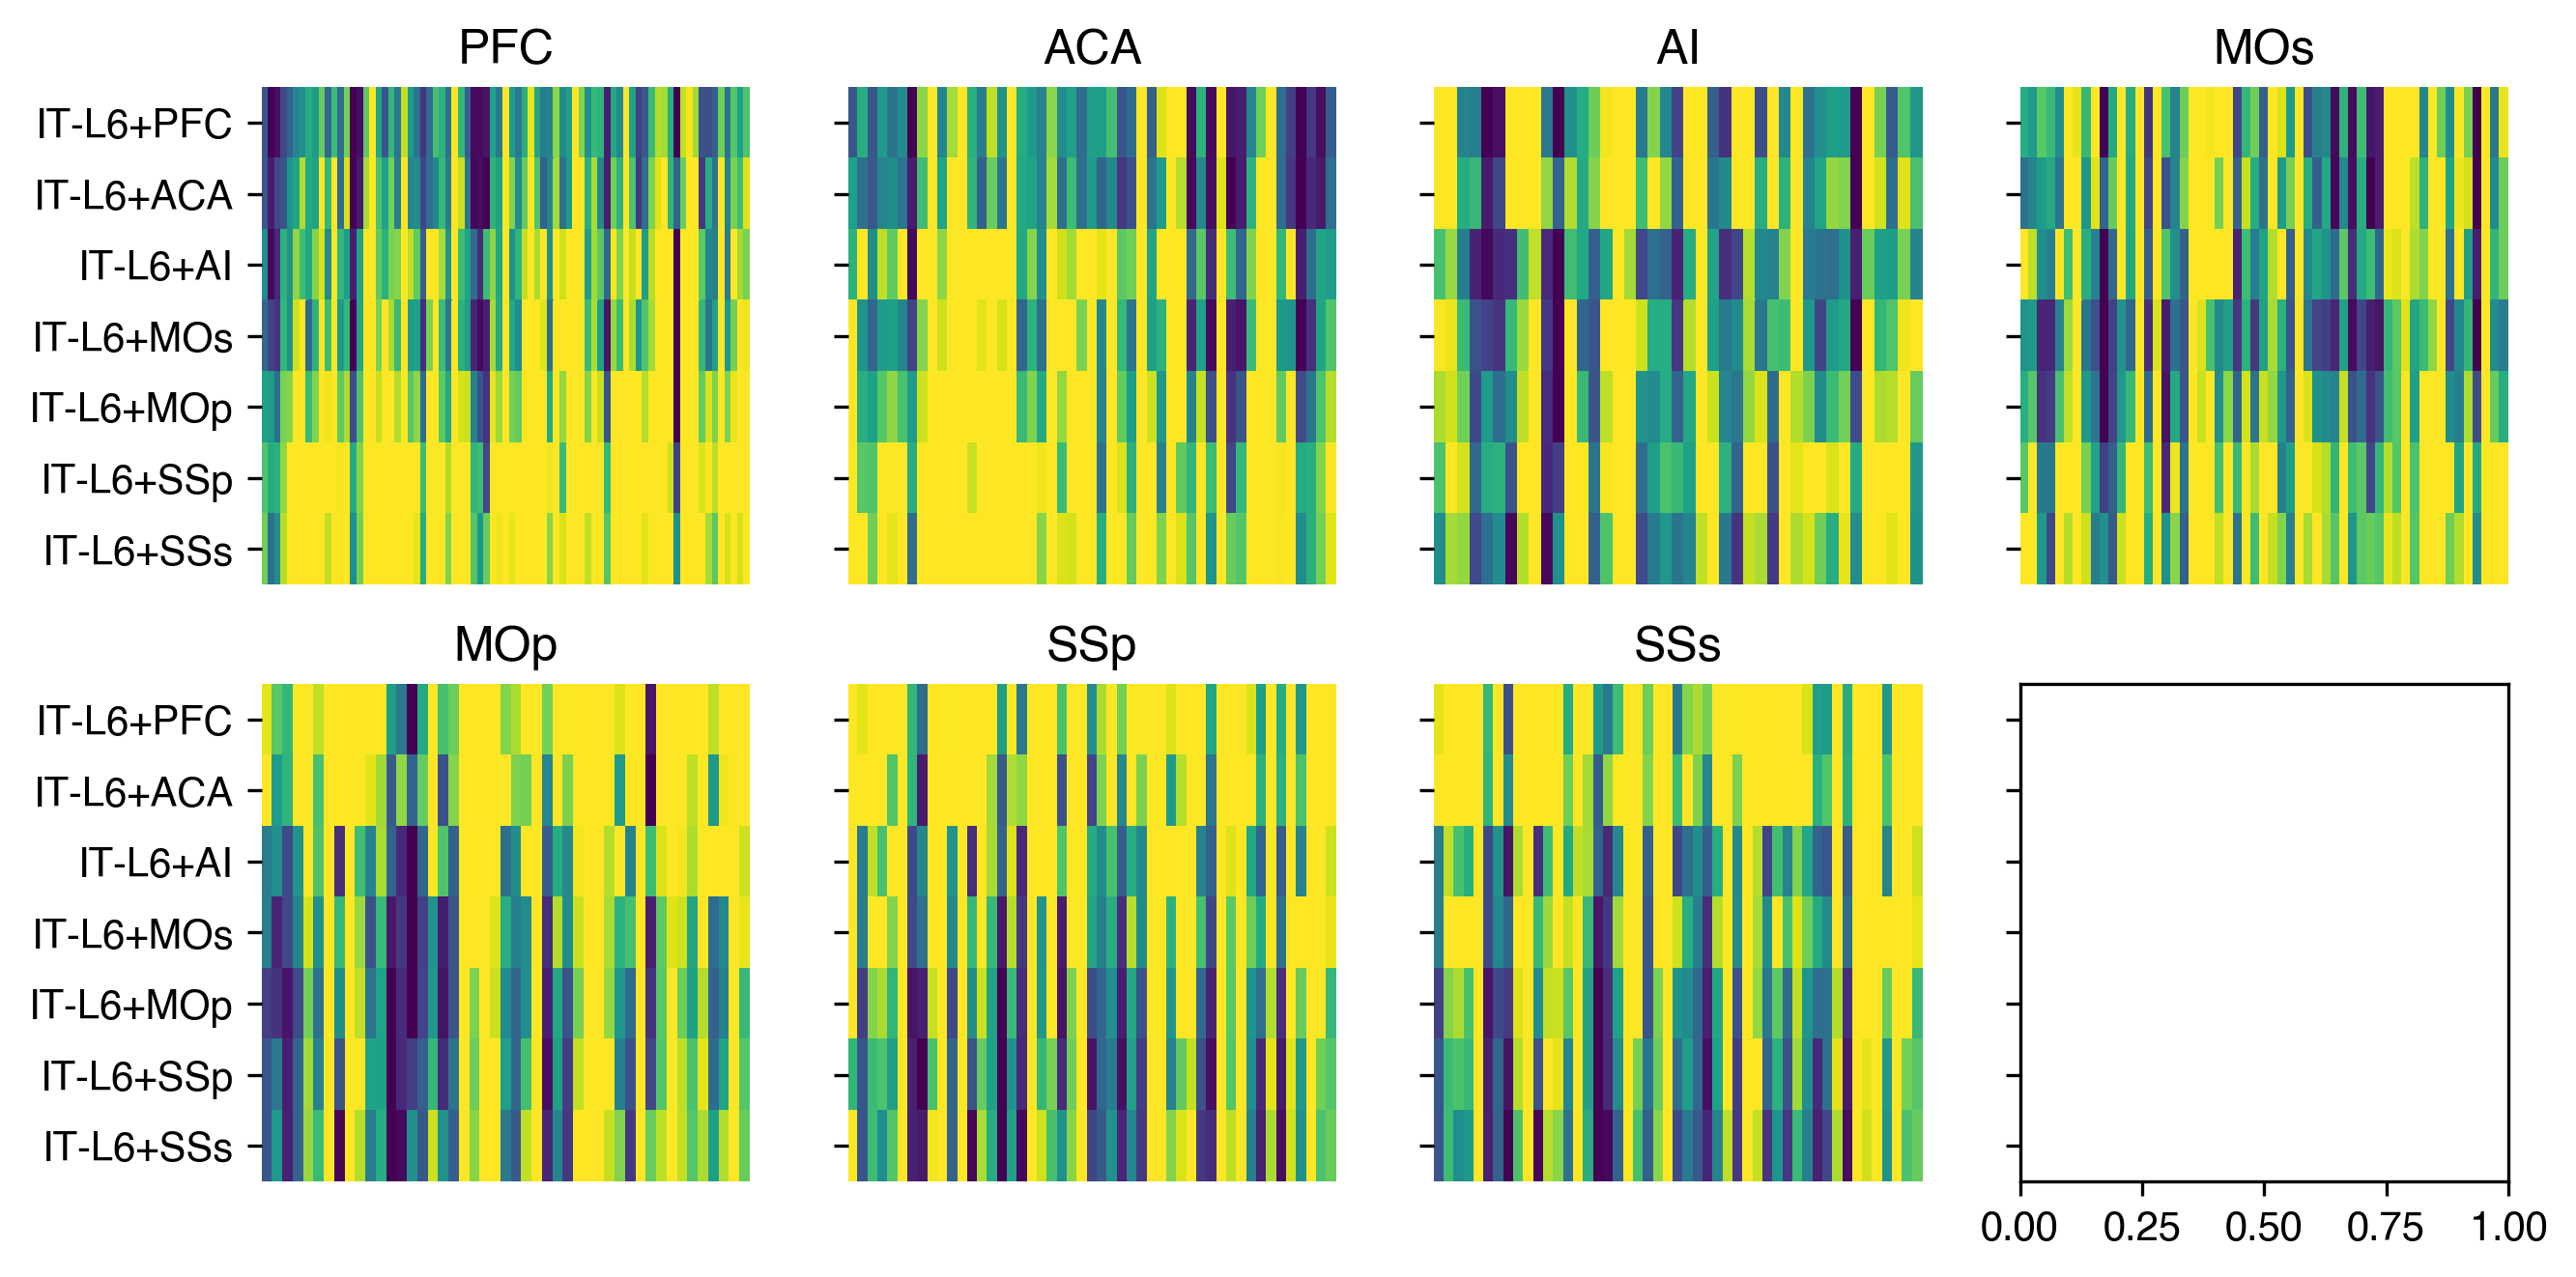

In [14]:
layer_dmg_result = dmg_result[dmg_result['FromLayer'] == layer]

region_hypo_genes = {}
for gene, gene_df in layer_dmg_result.groupby('gene_id'):
    pass_region = set(gene_df['FromRegion'].unique()) - set(gene_df['ToRegion'].unique())
    for region in pass_region:
        region_hypo_genes.setdefault(region, set()).add(gene)

records = {}
# shared markers
for region, genes in region_hypo_genes.items():
    for region2, genes2 in region_hypo_genes.items():
        records[(region, region2)] = len(genes & genes2)
        
region_order = ['PFC', 'ACA', 'AI', 'MOs', 'MOp', 'SSp', 'SSs']
sns.heatmap(pd.Series(records).unstack().loc[region_order, region_order], 
            annot=True)

fig, axes = plt.subplots(figsize=(10, 5), dpi=300, nrows=2, ncols=4, sharey=True)
for ax, region in zip(axes.flat, region_order):
    sns.heatmap(group_mch_level[group_mch_level.index.str.startswith(layer)][region_hypo_genes[region]], 
                vmin=0.5, vmax=1.5, ax=ax, cbar=False, cmap='viridis')
    ax.set(xticks=[], title=region, xlabel='', ylabel='')
    
import joblib
joblib.dump(region_hypo_genes, f'region_hypo_genes.{layer}.obj')

## Region specific marker constitant across layers?

In [15]:
region_marker_l23 = joblib.load('region_hypo_genes.IT-L23.obj')
region_marker_l5 = joblib.load('region_hypo_genes.IT-L5.obj')
region_marker_l6 = joblib.load('region_hypo_genes.IT-L6.obj')
region_marker_l23 = {k+'-L23': v for k, v in region_marker_l23.items()}
region_marker_l5 = {k+'-L5': v for k, v in region_marker_l5.items()}
region_marker_l6 = {k+'-L6': v for k, v in region_marker_l6.items()}

total_marker = {}
total_marker.update(region_marker_l23)
total_marker.update(region_marker_l5)
total_marker.update(region_marker_l6)

### The region specificity is mostly layer specific too

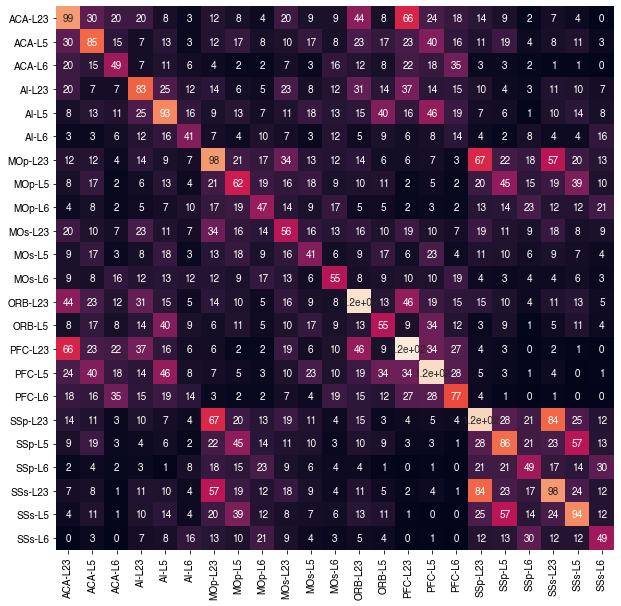

In [16]:
records = {}
# shared markers
for region, genes in total_marker.items():
    for region2, genes2 in total_marker.items():
        records[(region, region2)] = len(genes & genes2)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.Series(records).unstack(), cbar=False,
            annot=True)